### EDA and Model building on Credit_Lead Data set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#! pip install sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from logitboost import LogitBoost
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv(r"C:\Users\akash.raisoni\OneDrive - Fractal Analytics Pvt. Ltd\Desktop\Excel and Power BI\Python\train_credit.csv")


In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [5]:
df.shape

(245725, 11)

### Variable Identification

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


### Type casting the variables

In [7]:
df['Gender'] = df['Gender'].astype('category')
df['Region_Code'] = df['Region_Code'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Channel_Code'] = df['Channel_Code'].astype('category')
df['Credit_Product'] = df['Credit_Product'].astype('category')
df['Is_Active'] = df['Is_Active'].astype('category')
df['Is_Lead'] = df['Is_Lead'].astype('category')

In [8]:
df.info()     #to check where variable are properly typecasted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   245725 non-null  object  
 1   Gender               245725 non-null  category
 2   Age                  245725 non-null  int64   
 3   Region_Code          245725 non-null  category
 4   Occupation           245725 non-null  category
 5   Channel_Code         245725 non-null  category
 6   Vintage              245725 non-null  int64   
 7   Credit_Product       216400 non-null  category
 8   Avg_Account_Balance  245725 non-null  int64   
 9   Is_Active            245725 non-null  category
 10  Is_Lead              245725 non-null  category
dtypes: category(7), int64(3), object(1)
memory usage: 9.1+ MB


In [9]:
df.isna().sum()         #Credit_Product has some missing values, #ID col can be removed

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
df.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


In [11]:
# selecting numerical vars

num_vars = df.select_dtypes(include = ['int64', 'float64'])

In [12]:
num_vars

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787
...,...,...,...
245720,51,109,1925586
245721,27,15,862952
245722,26,13,670659
245723,28,31,407504


In [13]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (6*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

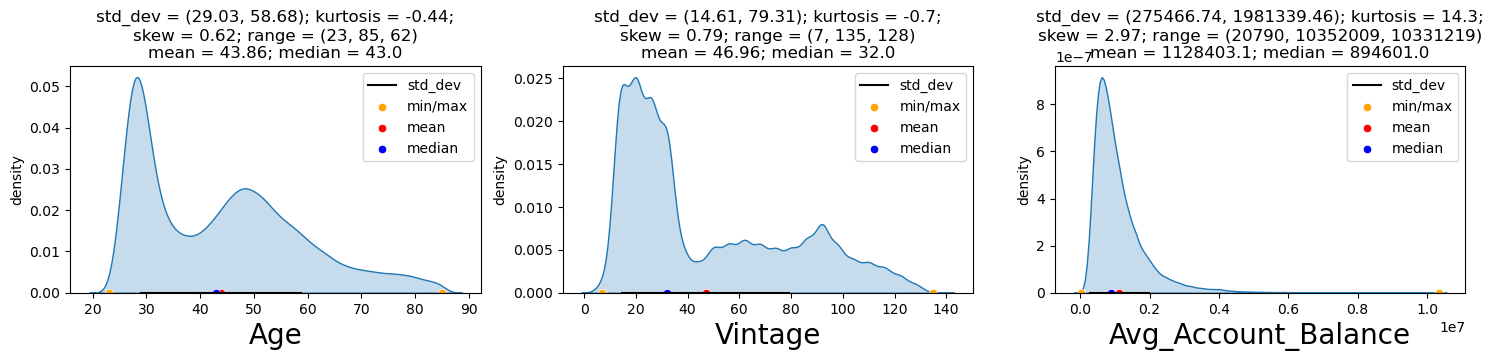

In [14]:
UVA_numeric(df,list(num_vars))

### EDA on Categorical Variables

In [15]:
df.describe(include='category')      #credit product has missing values

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead
count,245725,245725,245725,245725,216400,245725,245725
unique,2,35,4,4,2,2,2
top,Male,RG268,Self_Employed,X1,No,No,0
freq,134197,35934,100886,103718,144357,150290,187437


In [16]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 150)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 15)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

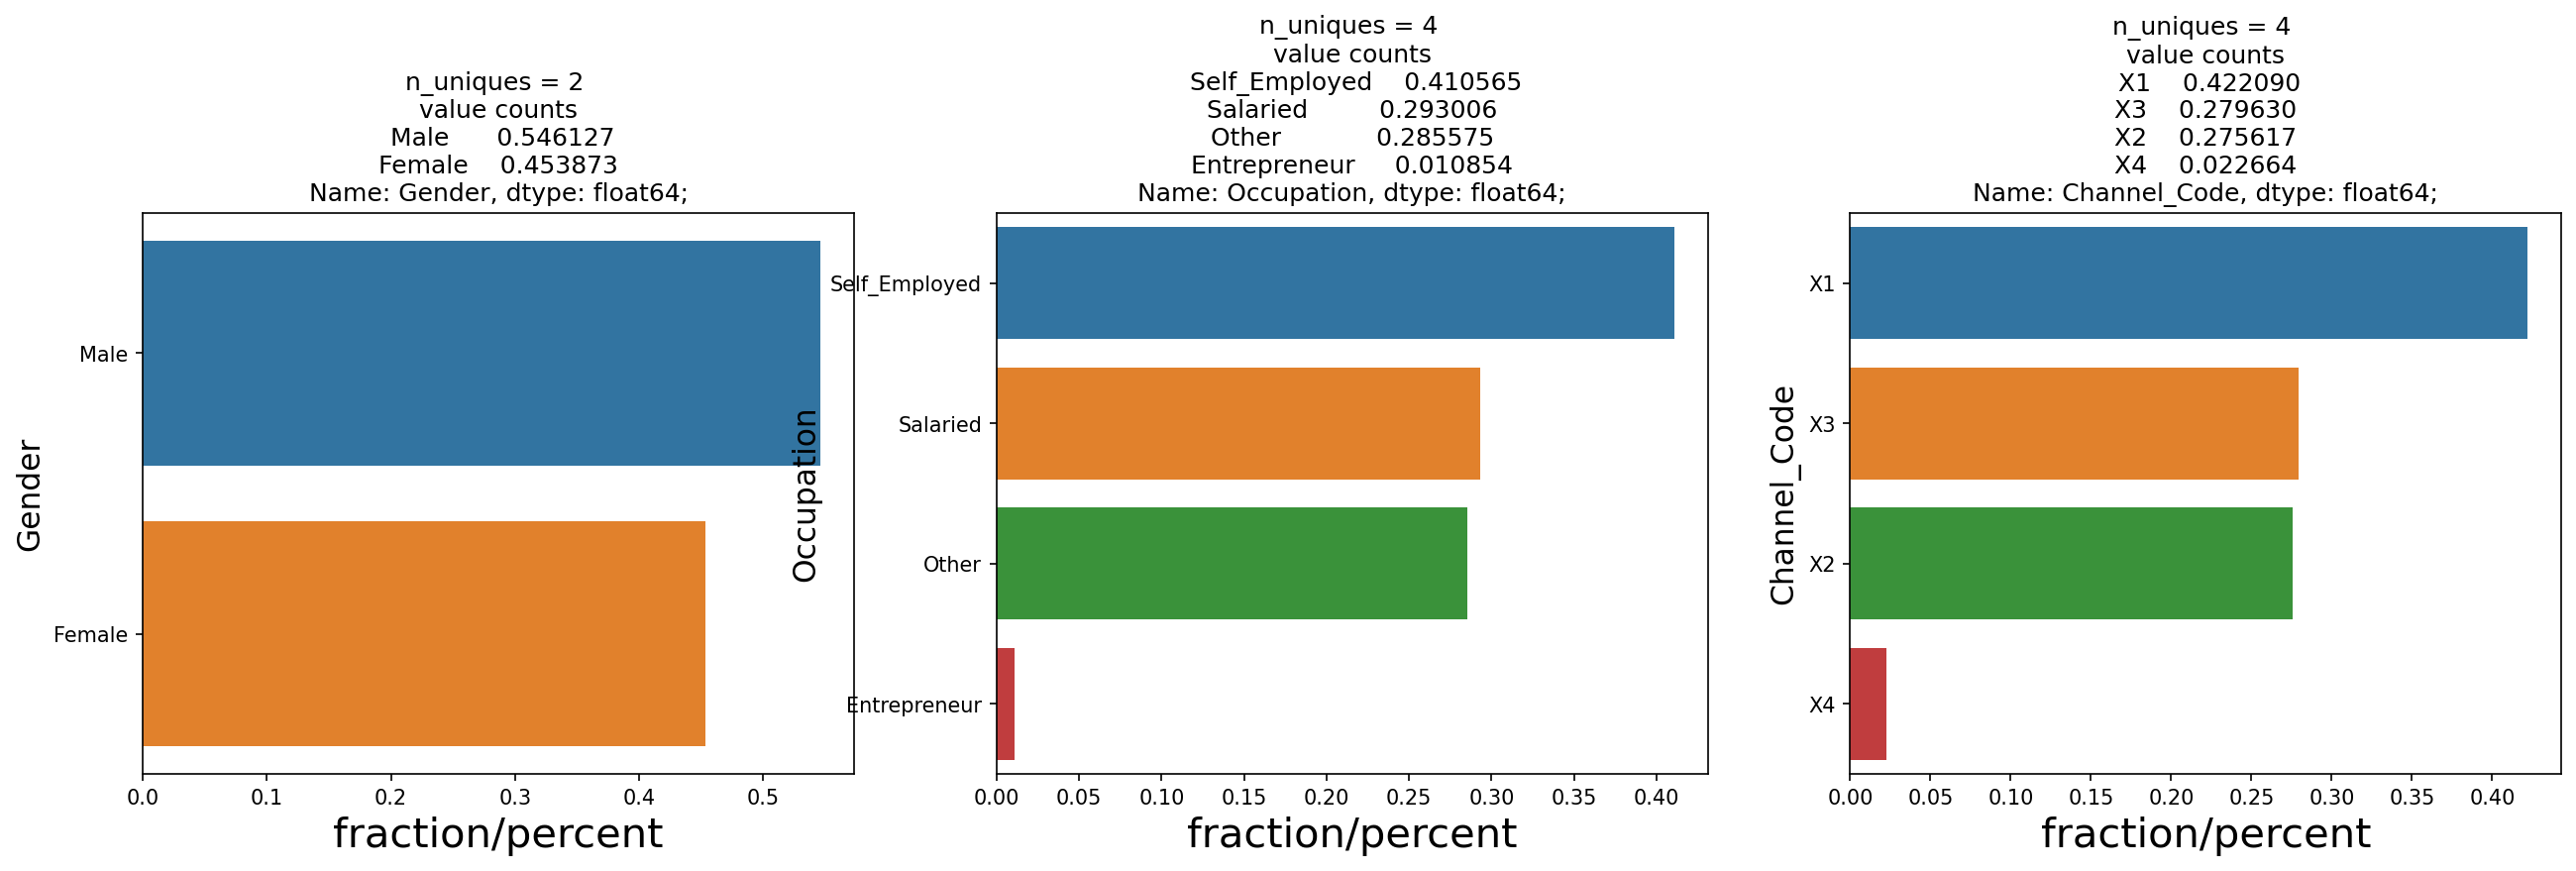

In [17]:
UVA_category(df,['Gender','Occupation','Channel_Code'])

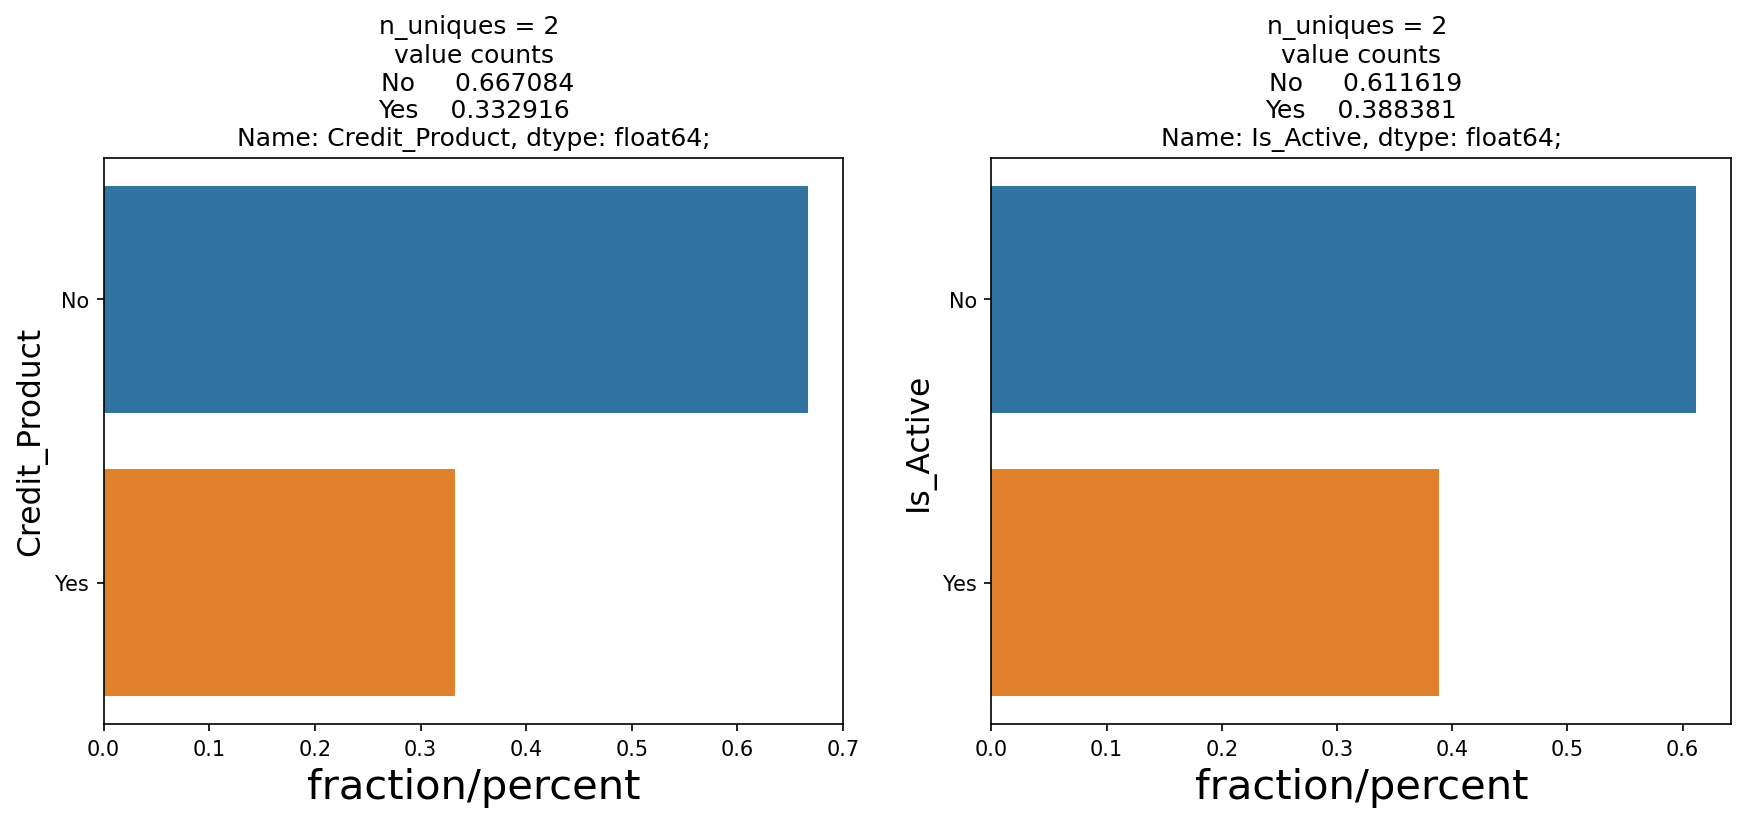

In [18]:
UVA_category(df,['Credit_Product','Is_Active'])

### EDA on customers who are interested in Credit Card

In [19]:
cat_df = df[df['Is_Lead']== 1].select_dtypes('category')
cat_df.head()

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead
6,Male,RG282,Other,X3,NaN,Yes,1
15,Male,RG268,Self_Employed,X2,NaN,Yes,1
16,Female,RG268,Other,X3,Yes,No,1
17,Female,RG283,Other,X3,Yes,No,1
20,Male,RG269,Self_Employed,X2,Yes,No,1


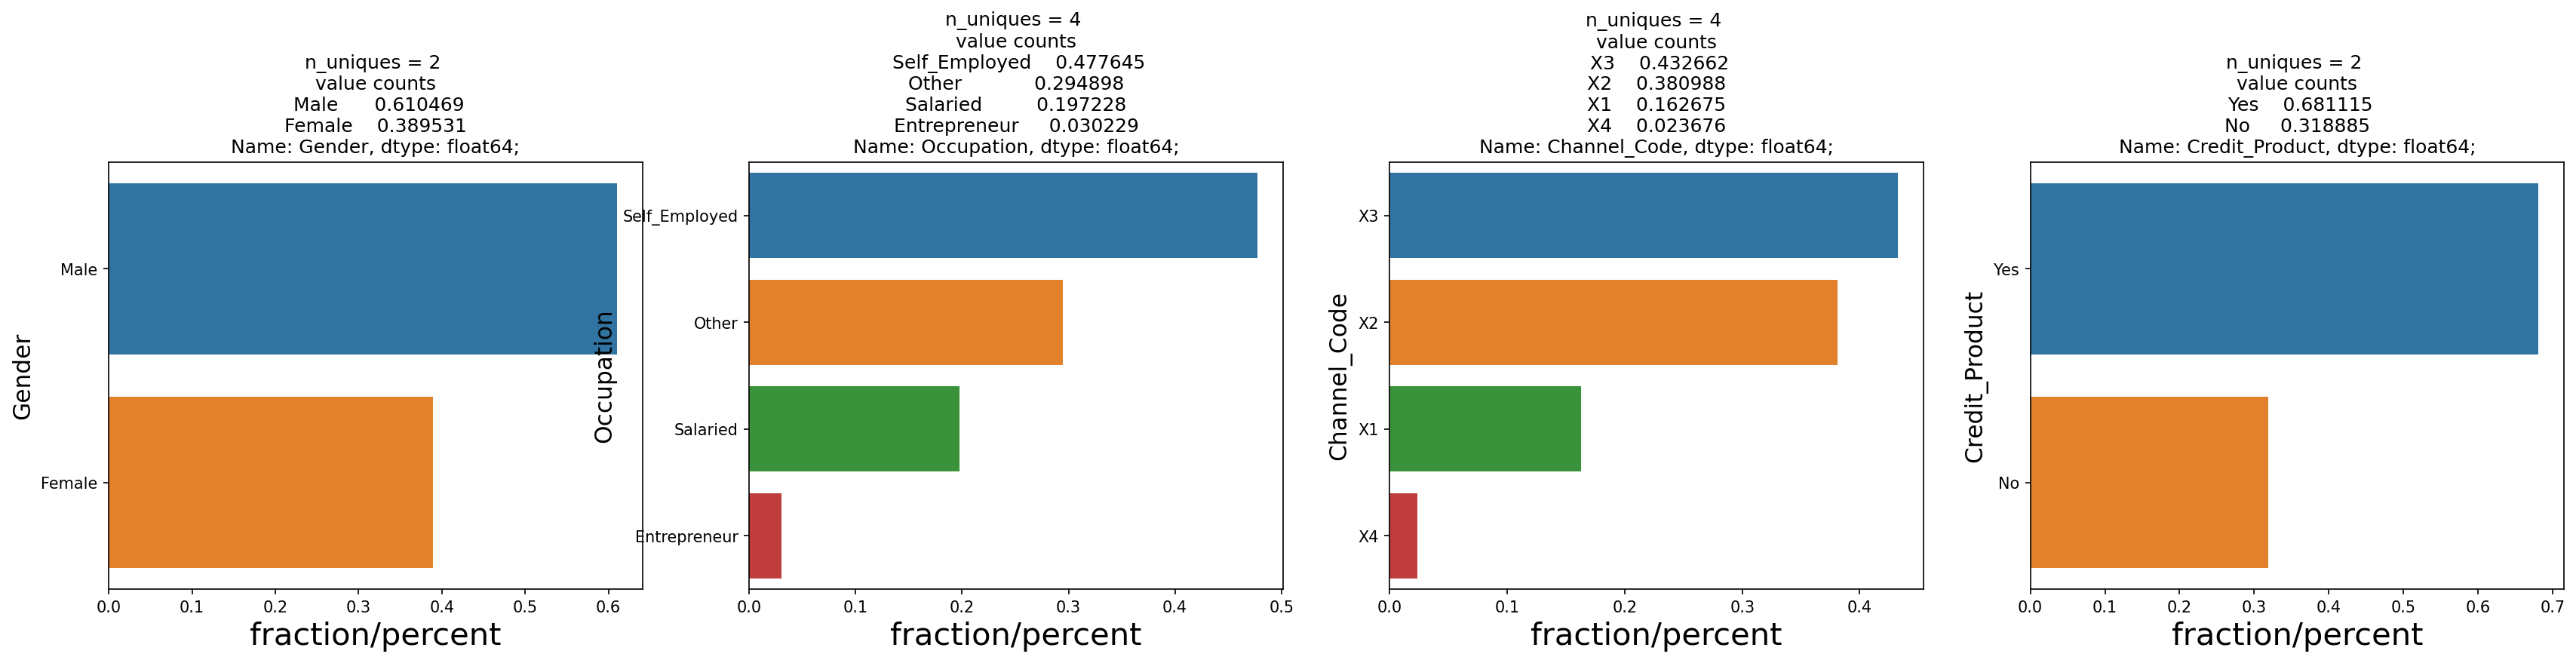

In [20]:
UVA_category(cat_df, ['Gender', 'Occupation','Channel_Code','Credit_Product'])

#### Almost 47 % of the customers who are interested belong to self employed profession, Followed by 29% of customers who are interested belon to self other occupation and just 3% are entreprenuers.  Among all the customers who are interested in credit card, 18% customers are from RG268 and 15% are from RG283

## ----------------------------------------------------
## EDA on numerical variable on interested customers

In [21]:
num_df = df[df['Is_Lead']== 1][['Age','Vintage','Avg_Account_Balance','Is_Lead']]
num_df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead
6,62,20,1056750,1
15,33,69,517063,1
16,46,97,2282502,1
17,59,15,2384692,1
20,44,19,1001650,1


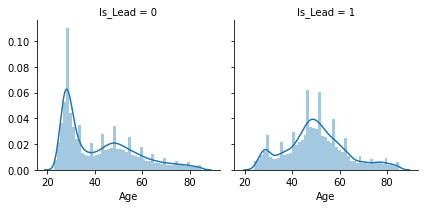

In [22]:
g = sns.FacetGrid(df, col='Is_Lead')
g = g.map(sns.distplot, "Age")

#### Customers in age group 20-40 are not interested in the credit card, while customers in the age group 40-60 are interested.

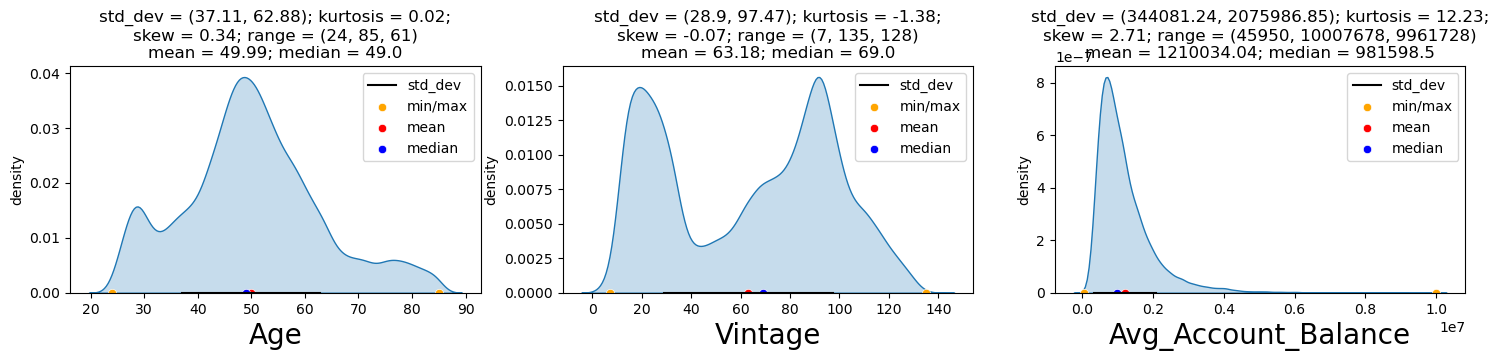

In [23]:
UVA_numeric(num_df, ['Age','Vintage','Avg_Account_Balance'])

## Visualizing Outliers

In [24]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True


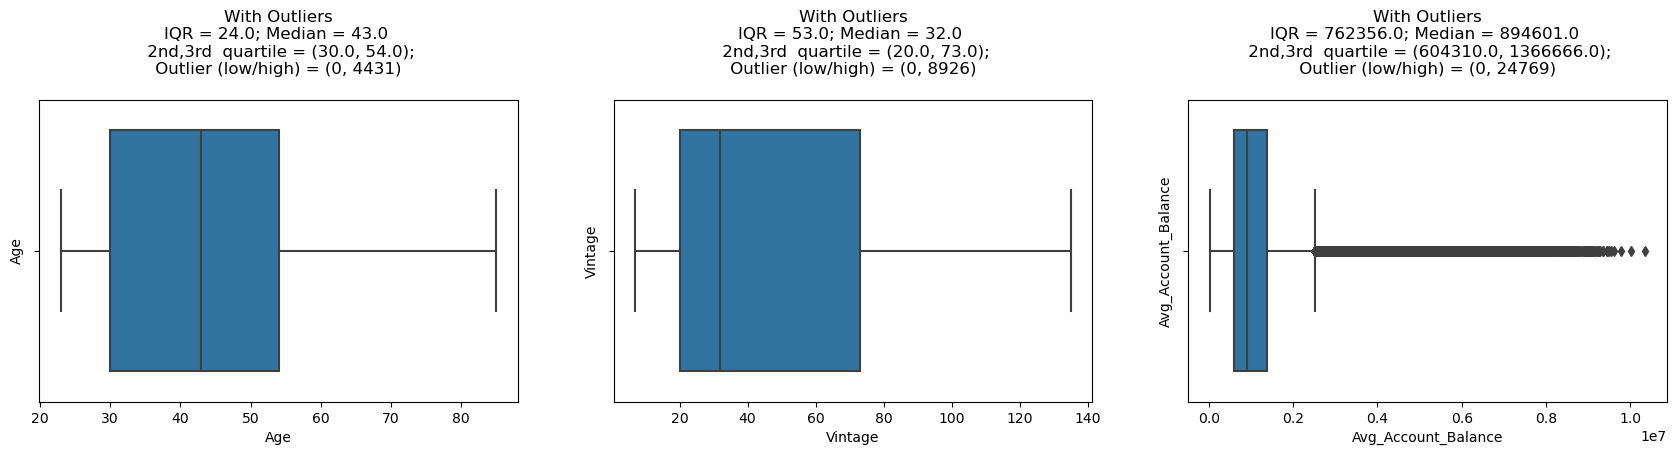

In [25]:
UVA_outlier(df, num_vars.columns, include_outlier = True)

### Average acc balance contains outliers which needs to fixed

------------------------------------------------------------------------------
## Bivariate Analysis
### Analyzing Correlation between all numerical features (Cont - Cont)

In [26]:
num_vars.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

In [27]:
# calculating correlation
correlation = num_vars.dropna().corr()
correlation

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


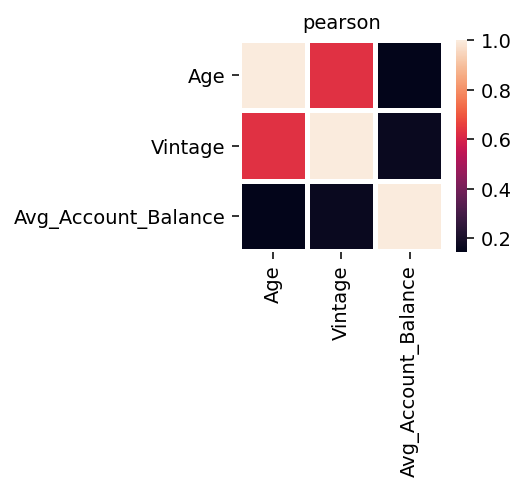

In [28]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(8,2), dpi=140)
for j,i in enumerate(['pearson']):
  plt.subplot(1,3,j+1)
  correlation = num_vars.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=10)

### we can see age and vintage have a slight higher correlation 0.63

## Bivariate analysis (Cat - Cont)
List of Hypothesis and investigation to perform under this combination.

1.  Are vintage customers less likely to be intersted in credit card?
2.  Are customers with higher average balance less likely to be interested in credit card ?


In [29]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [30]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [65]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  print(m1, m2, std1, std2, n1, n2)
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
  print(t_p_val,z_p_val)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (10,3), dpi=110)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

In [76]:
def TwoSamp_1Z(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  print (ovr_sigma)
  z = (X1 - X2)/ovr_sigma
  print(z)
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [77]:
from scipy.stats import norm

#### 1. Are vintage customers less likely to be intersted in credit card? 

63.18307370299204 41.91392307815426 34.28329681919396 41.91392307815426 58288 187437
0.0 0.0


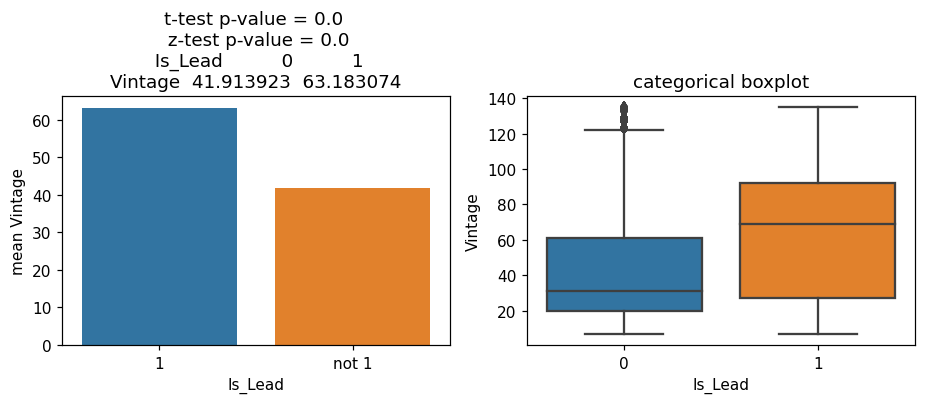

In [66]:
Bivariate_cont_cat(df, 'Vintage', 'Is_Lead',1)    #we reject the null hypothesis

### 2.Are customers with higher average acc balance less likely to be interested in credit card ?

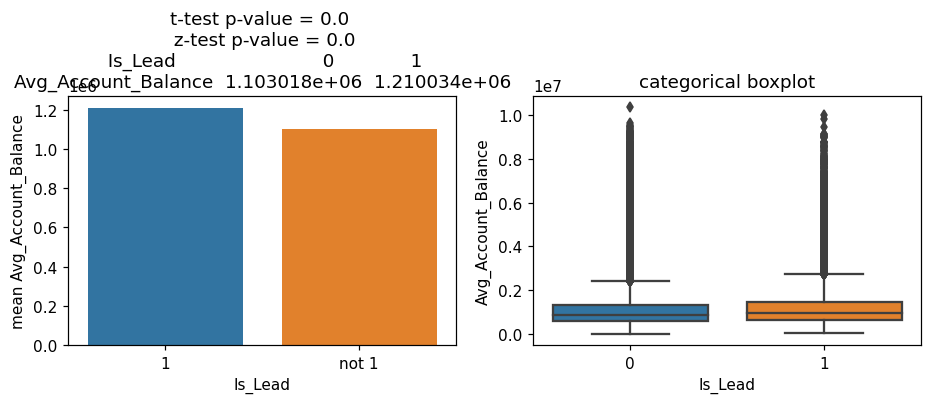

In [33]:
Bivariate_cont_cat(df, 'Avg_Account_Balance', 'Is_Lead', 1)    #they are more interested in credit card

## Bivariate analysis (Cat - Cat)
1. Are young customers more likely to be interested in buying CC?
2. Are females less likely to be interested in Credit Card?
3. Are  active customers more likely to buy credit card
4. Does occupation have any relation with buying Credit card?

Missing Values - finding behaviour

Credit Product:

Do missing values more like to buy Credit Card more?


In [41]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### 1.Are young customers more likely to be interested in buying CC?

In [42]:
# segregating customers into segments
Lead_Age = df[['Is_Lead','Age']][:]
Lead_Age['age_group'] = 'str'
Lead_Age['age_group'][Lead_Age['Age']>=80] = 'very old'
Lead_Age['age_group'][(Lead_Age['Age']<80) & (Lead_Age['Age']>=60)] = 'senior citizen'
Lead_Age['age_group'][(Lead_Age['Age']<60) & (Lead_Age['Age']>=18)] = 'adult'
Lead_Age['age_group'][Lead_Age['Age']<18] = 'young'

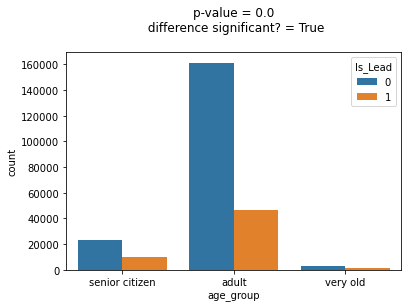

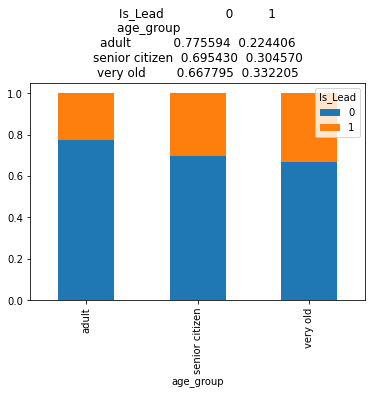

In [43]:
BVA_categorical_plot(Lead_Age, 'Is_Lead', 'age_group')   #0 and 1 should be interchanged i guess, pvalue not show

### 2. Are females less likely to be interested in Credit Card?

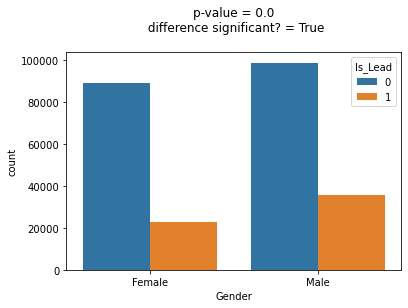

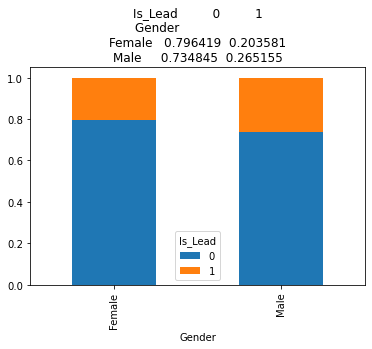

In [38]:
BVA_categorical_plot(df, 'Is_Lead', 'Gender')

## 3.Are active customers more likely to buy credit card?

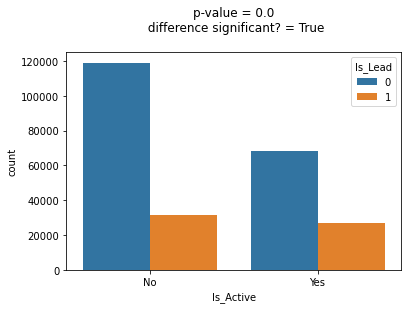

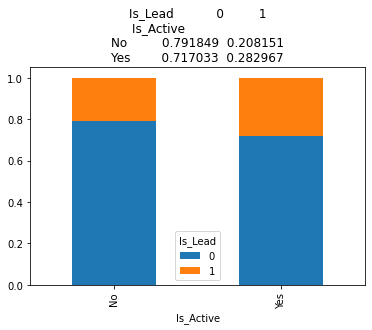

In [45]:
BVA_categorical_plot(df, 'Is_Lead', 'Is_Active')

### 4.Does occupation have any relation with buying Credit card?

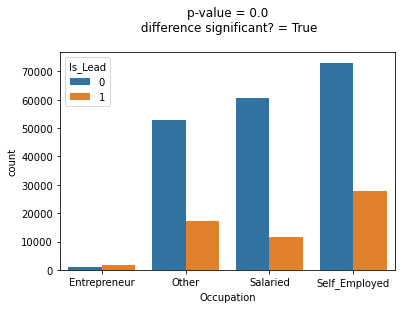

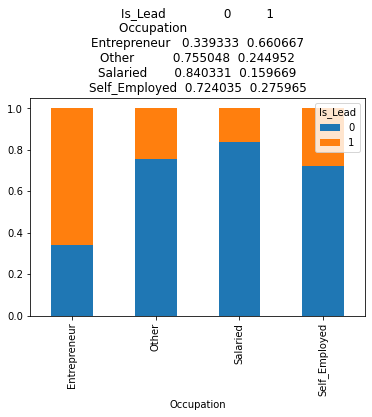

In [46]:
BVA_categorical_plot(df, 'Is_Lead', 'Occupation')

## Model Building Proprocessing Starts here

In [2]:
train = pd.read_csv(r"C:\Users\akash.raisoni\OneDrive - Fractal Analytics Pvt. Ltd\Desktop\Excel and Power BI\Python\train_credit.csv")
test = pd.read_csv(r"C:\Users\akash.raisoni\OneDrive - Fractal Analytics Pvt. Ltd\Desktop\Excel and Power BI\Python\test_credit.csv")

In [3]:
RANDOM_SEED = 42

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.shape, test.shape

((245725, 11), (105312, 10))

## Data Preprocessing

In [6]:
X = train.drop(["ID",'Is_Lead'], axis = 1)
Y =  train['Is_Lead']

X_test = test.drop(["ID"], axis = 1)

In [7]:
X.shape, X_test.shape

((245725, 9), (105312, 9))

### Remove Duplicates

In [72]:
X[X.duplicated(keep= False)]
X_test[X_test.duplicated(keep= False)]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
14874,Male,44,RG268,Self_Employed,X1,31,No,4260510,No
90925,Male,44,RG268,Self_Employed,X1,31,No,4260510,No


### Seperating categorical and numerical features

In [73]:
num_features = [ 'Age',  'Vintage', 'Avg_Account_Balance']

cat_features = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active']

In [74]:
#Filling out the missing values in 'Credit Product'

In [75]:
X['Credit_Product'] = X['Credit_Product'].fillna(value='Unknown')
X_test['Credit_Product'] = X_test['Credit_Product'].fillna(value='Unknown')

In [76]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No


#### Normalizing Average balance

In [77]:
X[num_features] = np.log(X[num_features])
X_test[num_features] = np.log(X_test[num_features])


In [78]:
### Label Encoding to Cat variables
label = LabelEncoder()
for col in cat_features:
    X[col]= label.fit_transform(X[col])
    X_test[col]= label.transform(X_test[col])

In [79]:
X_test.corr()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
Gender,1.000000,0.162866,0.000323,0.028172,0.150226,0.138517,0.068227,0.033607,0.069032
Age,0.162866,1.000000,0.128100,-0.051653,0.643234,0.652671,0.219342,0.167625,0.237614
Region_Code,0.000323,0.128100,1.000000,0.019731,0.106772,0.111858,0.068009,0.092777,0.059536
Occupation,0.028172,-0.051653,0.019731,1.000000,0.124109,0.042893,0.018809,-0.036330,0.076936
Channel_Code,0.150226,0.643234,0.106772,0.124109,1.000000,0.483678,0.252061,0.121968,0.251515
Vintage,0.138517,0.652671,0.111858,0.042893,0.483678,1.000000,0.158950,0.196186,0.192168
Credit_Product,0.068227,0.219342,0.068009,0.018809,0.252061,0.158950,1.000000,0.078661,-0.093833
Avg_Account_Balance,0.033607,0.167625,0.092777,-0.036330,0.121968,0.196186,0.078661,1.000000,0.085056
Is_Active,0.069032,0.237614,0.059536,0.076936,0.251515,0.192168,-0.093833,0.085056,1.000000


## Machine Learning Workflow Starts here

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state = RANDOM_SEED, stratify = Y, test_size = 0.20)

In [82]:

#scaler = StandardScaler()      


#x_train = scaler.fit_transform(x_train)
#x_val = scaler.transform(x_val)
#X_test = scaler.transform(X_test)


In [83]:
scaler = MinMaxScaler()      


x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
X_test = scaler.transform(X_test)

## Model Building

In [84]:
%%time
# quick knn model
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)

clf.fit(x_train, y_train)  

# make training prediction
yhat_train = clf.predict(x_train)
train_score = roc_auc_score(y_train, yhat_train)

# make  validation prediction
yhat_val = clf.predict(x_val)
val_score = roc_auc_score(y_val, yhat_val)


# make test prediction  
yhat_test = clf.predict(X_test)

print(train_score, val_score)

0.8021006895071251 0.754050795251841
Wall time: 40.4 s


In [85]:
#output = pd.DataFrame({'ID' : test['ID'],
 #                     'Is_Lead' : yhat_test})
#output.to_csv('output1.csv', index = False)

In [86]:
# Logistic Regression gives the probability of a data point to belong a default class (Y=1).
# P(Y=1 | X) = 1/[1+ exp(w0+w1X1 + w2X2+.....)]

# These probabilities are caclulated by using the Sigmoid/logistic function = 1/[1+ exp(w0+w1X1 + w2X2+.....)]

# where wj => model weights/paramters, learnt by the algo by minimizing the BinaryCrossEntropy Cost/Loss Function
# and Xi are the feature values. X=[X1, X2, X3 .....]

lr = LR(max_iter = 10000, penalty = "l2", solver = 'sag')
lr.fit(x_train, y_train)

# make training prediction
yhat_train = lr.predict(x_train)
train_score = roc_auc_score(y_train, yhat_train)

# make validation prediction
yhat_val = clf.predict(x_val)
val_score = roc_auc_score(y_val, yhat_val)

# make test prediction
yhat_test = lr.predict(X_test)


print(train_score, val_score)

0.5665366945890963 0.754050795251841


In [25]:
'''
penalty = 'l2', solver = 'sag'  = 0.5747695039099816 0.7376821334203658
same results with l1/saga, l1/liblinear
'''

"\npenalty = 'l2', solver = 'sag'  = 0.5747695039099816 0.7376821334203658\nsame results with l1/saga, l1/liblinear\n"

In [87]:
# Decision Tree Classifier (best here)
dt_model = DT(random_state = RANDOM_SEED, max_depth = 7)
dt_model.fit(x_train, y_train)

# make training prediction
yhat_train = dt_model.predict(x_train)
train_score = roc_auc_score(y_train, yhat_train)

# make validation prediction
yhat_val = dt_model.predict(x_val)
val_score = roc_auc_score(y_val, yhat_val)

# make test prediction
yhat_test = dt_model.predict(X_test)


print(train_score, val_score)

0.7564275796557248 0.7543582352787543


In [28]:
#!pip install logitboost

You should consider upgrading via the 'C:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [90]:
lboost = LogitBoost(n_estimators = 300, random_state = RANDOM_SEED)
lboost.fit(x_train, y_train)


# make training prediction
yhat_train = lboost.predict_proba(x_train)
train_score = roc_auc_score(y_train, yhat_train[:,1])

# make validation prediction
yhat_val = lboost.predict_proba(x_val)
val_score = roc_auc_score(y_val, yhat_val[:,1])

# make test prediction
yhat_test = lboost.predict_proba(X_test)


print(train_score, val_score)

0.864029420272123 0.8623703955691201


In [46]:
#!pip install xgboost

You should consider upgrading via the 'C:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [91]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False )

model.fit(x_train, y_train)


# make training prediction
yhat_train = model.predict_proba(x_train)
train_score = roc_auc_score(y_train, yhat_train[:,1])

# make validation prediction
yhat_val = model.predict_proba(x_val)
val_score = roc_auc_score(y_val, yhat_val[:,1])

# make test prediction
yhat_test = model.predict_proba(X_test)


print(train_score, val_score)

[16:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8935450694587809 0.871966746836736


In [92]:
model = xgb.XGBClassifier(base_score=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=RANDOM_SEED,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(x_train, y_train)


# make training prediction
yhat_train = model.predict_proba(x_train)
train_score = roc_auc_score(y_train, yhat_train[:,1])

# make validation prediction
yhat_val = model.predict_proba(x_val)
val_score = roc_auc_score(y_val, yhat_val[:,1])

# make test prediction
yhat_test = model.predict_proba(X_test)


print(train_score, val_score)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8851511506766463 0.8732285738738145


In [28]:
#LGBM classifier
lg = LGBMClassifier()

lg.fit(x_train, y_train)


# make training prediction
yhat_train = lg.predict_proba(x_train)
train_score = roc_auc_score(y_train, yhat_train[:,1])

# make validation prediction
yhat_val = lg.predict_proba(x_val)
val_score = roc_auc_score(y_val, yhat_val[:,1])

# make test prediction
yhat_test = lg.predict_proba(X_test)


print(train_score, val_score)




0.8817212311888651 0.873498839693832


In [93]:
models = []
models.append(('LR', LR()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DT()))
models.append(('LGBM', LGBMClassifier()))

In [94]:
# CV on the Standardized Data
from sklearn.model_selection import KFold, cross_val_score
results = []
names = []
n_splits = 5

for name, model in models:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=5)
#     cv_results = cross_val_score(model, X_std, y, cv=kfold, scoring='f1')  #ver 1
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='f1')  # ver 2  # this where the data leakage is happenning!

    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)
    
results_df = pd.DataFrame(results, index=names, columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

LR: 28.88 ( 0.57)
KNN: 62.01 ( 0.20)
CART: 55.02 ( 0.21)
LGBM: 64.95 ( 0.18)


,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LGBM,64.730080,64.813206,65.238489,65.035036,64.915611,64.946484,0.199158
KNN,61.632400,62.053123,62.160857,62.068307,62.159289,62.014795,0.219529
CART,54.726493,55.146966,55.102905,55.297721,54.808222,55.016461,0.240342
LR,28.433451,28.860131,29.821450,29.120300,28.182957,28.883658,0.638294


In [62]:
len(yhat_test), len(test['ID'])

(105312, 105312)

In [63]:
output = pd.DataFrame({'ID' : test['ID'],
                      'Is_Lead' : yhat_test[:,1]})
output.to_csv('output_LGBM.csv', index = False)

In [64]:
yhat_test

array([[0.95701635, 0.04298365],
       [0.12504017, 0.8749598 ],
       [0.9309832 , 0.06901683],
       ...,
       [0.93014234, 0.06985767],
       [0.7801658 , 0.21983421],
       [0.9524924 , 0.04750761]], dtype=float32)

In [95]:
output.head()

,ID,Is_Lead
0,VBENBARO,0.042984
1,CCMEWNKY,0.874960
2,VK3KGA9M,0.069017
3,TT8RPZVC,0.023126
4,SHQZEYTZ,0.022801
